In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
dataset = pd.read_csv("/content/bank-full.csv", sep=';')  # Assuming the file is delimited by semi-colons based on its format

# Display the first few rows of the dataset
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Check the shape of the dataset
num_records, num_features = dataset.shape
num_records, num_features

(45211, 17)

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().sum() / num_records) * 100
missing_percentage

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

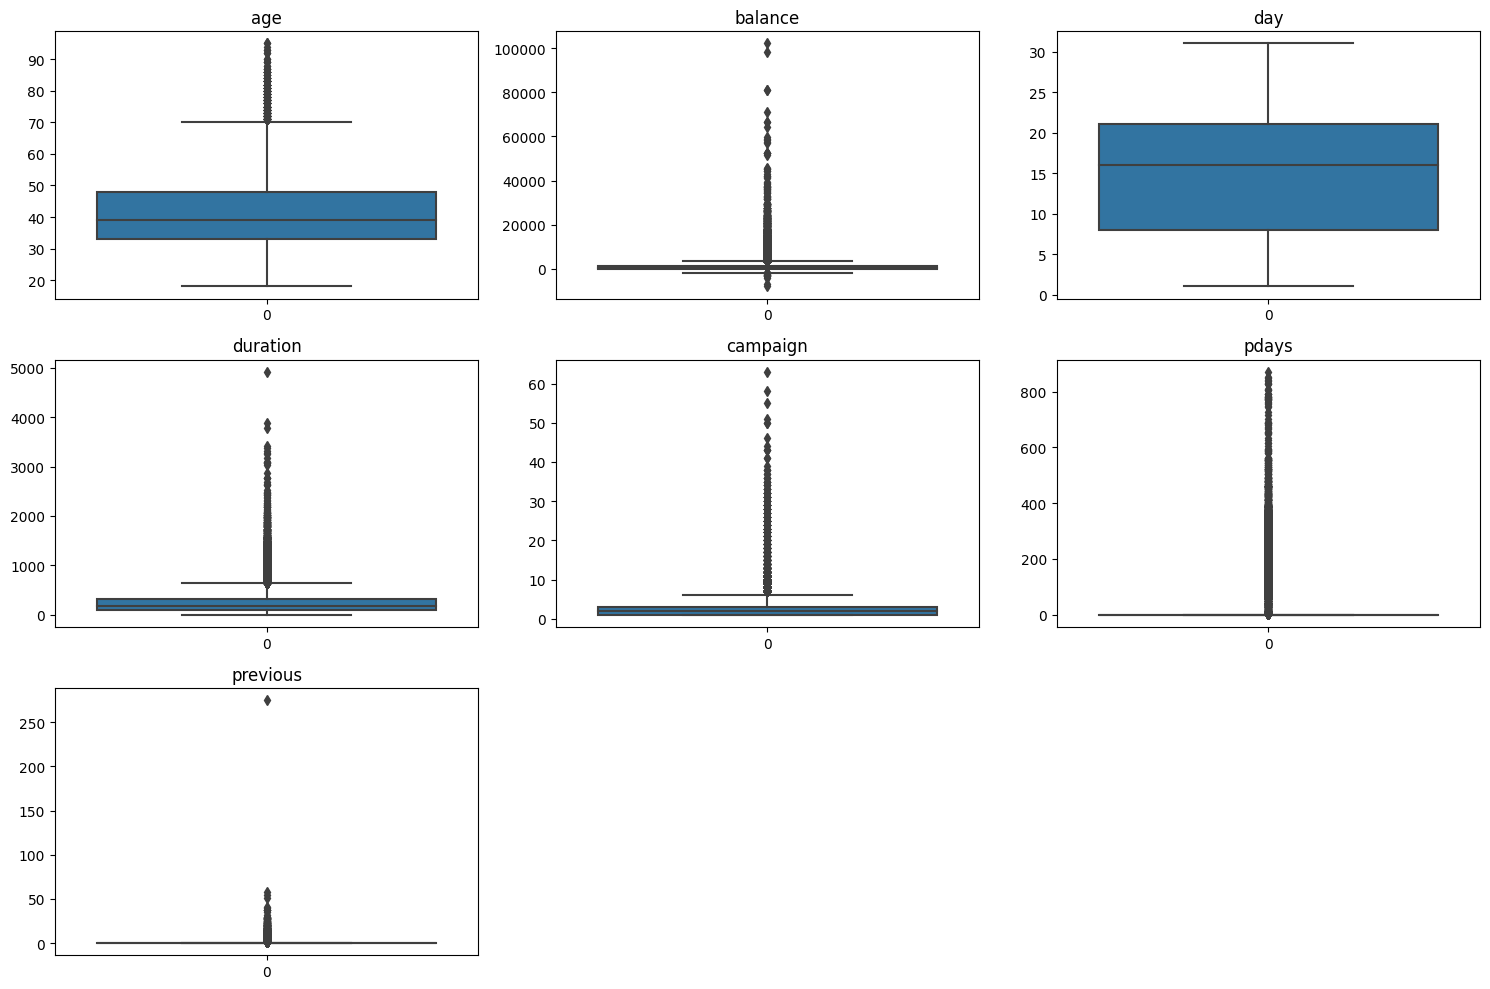

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns for visualization
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numeric column to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

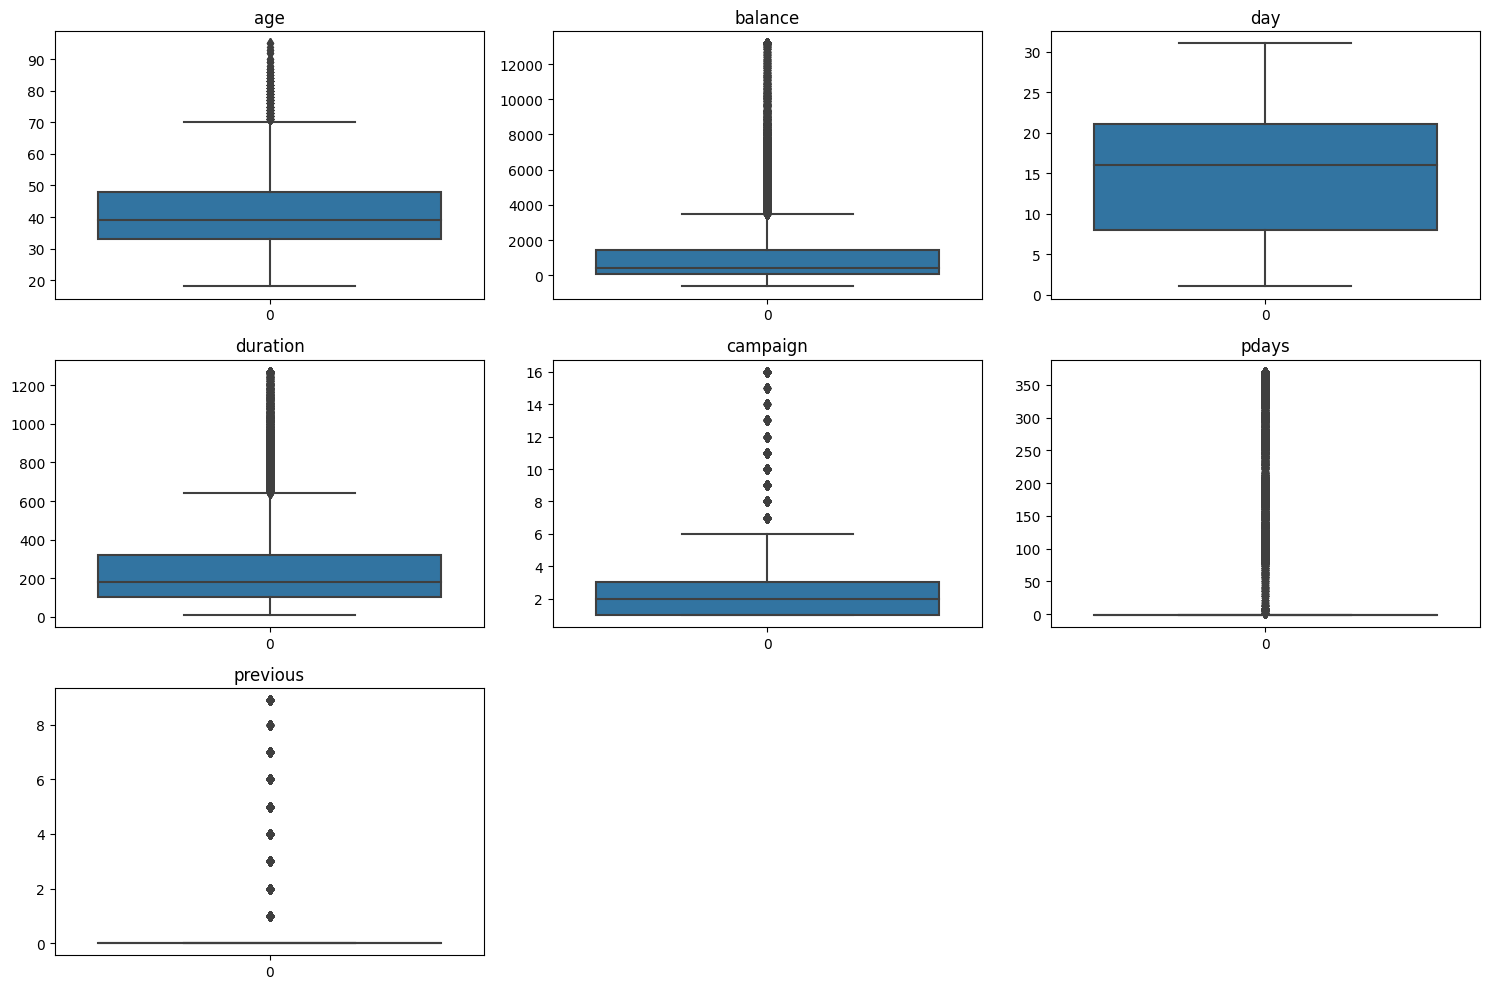

In [ ]:
# Cap outliers based on the 1st and 99th percentiles
for col in ['balance', 'duration', 'campaign', 'pdays', 'previous']:
    lower = dataset[col].quantile(0.01)
    upper = dataset[col].quantile(0.99)
    dataset[col] = dataset[col].clip(lower, upper)

# Plot the boxplots again to verify the changes
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Check the distribution of the target variable 'y'
target_distribution = dataset['y'].value_counts(normalize=True) * 100
target_distribution

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [ ]:
data=dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create label encoders for binary categorical variables
binary_columns = ['default', 'housing', 'loan', 'y']
label_encoders = {col: LabelEncoder() for col in binary_columns}

# Apply label encoding to binary columns
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Apply one-hot encoding to multi-category variables and drop the original columns
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Display the transformed data
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,261,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29.0,1,0,5,151,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2.0,1,1,5,76,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506.0,1,0,5,92,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1.0,0,0,5,198,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 42), (9043, 42), (36168,), (9043,))

In [ ]:
n_features = X_train.shape[1]
n_features

42

In [ ]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Step 1: define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
1131/1131 [==============================] - 5s 2ms/step - loss: 0.2842 - accuracy: 0.8870
Epoch 2/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2236 - accuracy: 0.9006
Epoch 3/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2164 - accuracy: 0.9019
Epoch 4/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2128 - accuracy: 0.9038
Epoch 5/150
1131/1131 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9036
Epoch 6/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2083 - accuracy: 0.9047
Epoch 7/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2065 - accuracy: 0.9060
Epoch 8/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2049 - accuracy: 0.9065
Epoch 9/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2038 - accuracy: 0.9070
Epoch 10/150
1131/1131 [==============================] - 2s 2ms/step - l

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

283/283 [==============================] - 1s 2ms/step


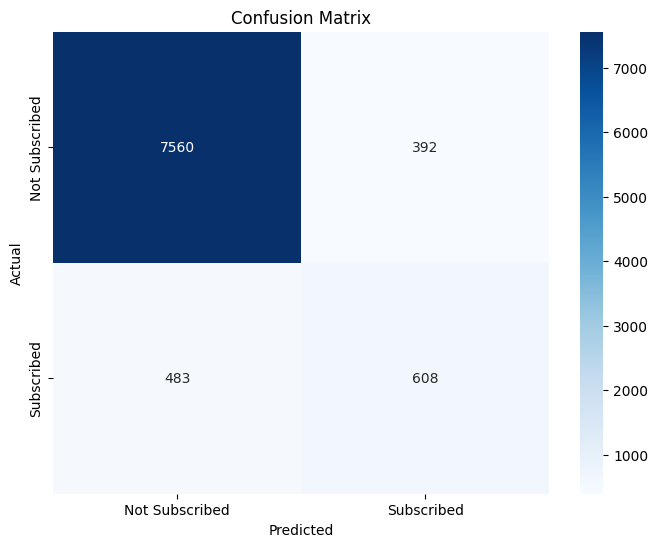

In [ ]:
# Compute the confusion matrix using TensorFlow
conf_matrix = tf.math.confusion_matrix(y_test, y_pred).numpy()

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()